In [98]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

## Data analysis

###### heart.csv

In [80]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [82]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Deleting duplicates

In [83]:
duplicate_rows = pd.DataFrame(data.duplicated(), columns =['value'])
duplicate_rows.loc[duplicate_rows['value'] == True]

,value
164,True


In [84]:
data.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


##### The data has no missing or unknown values

In [85]:
corr_data = data.copy()
correlation_matrix = corr_data.corr()

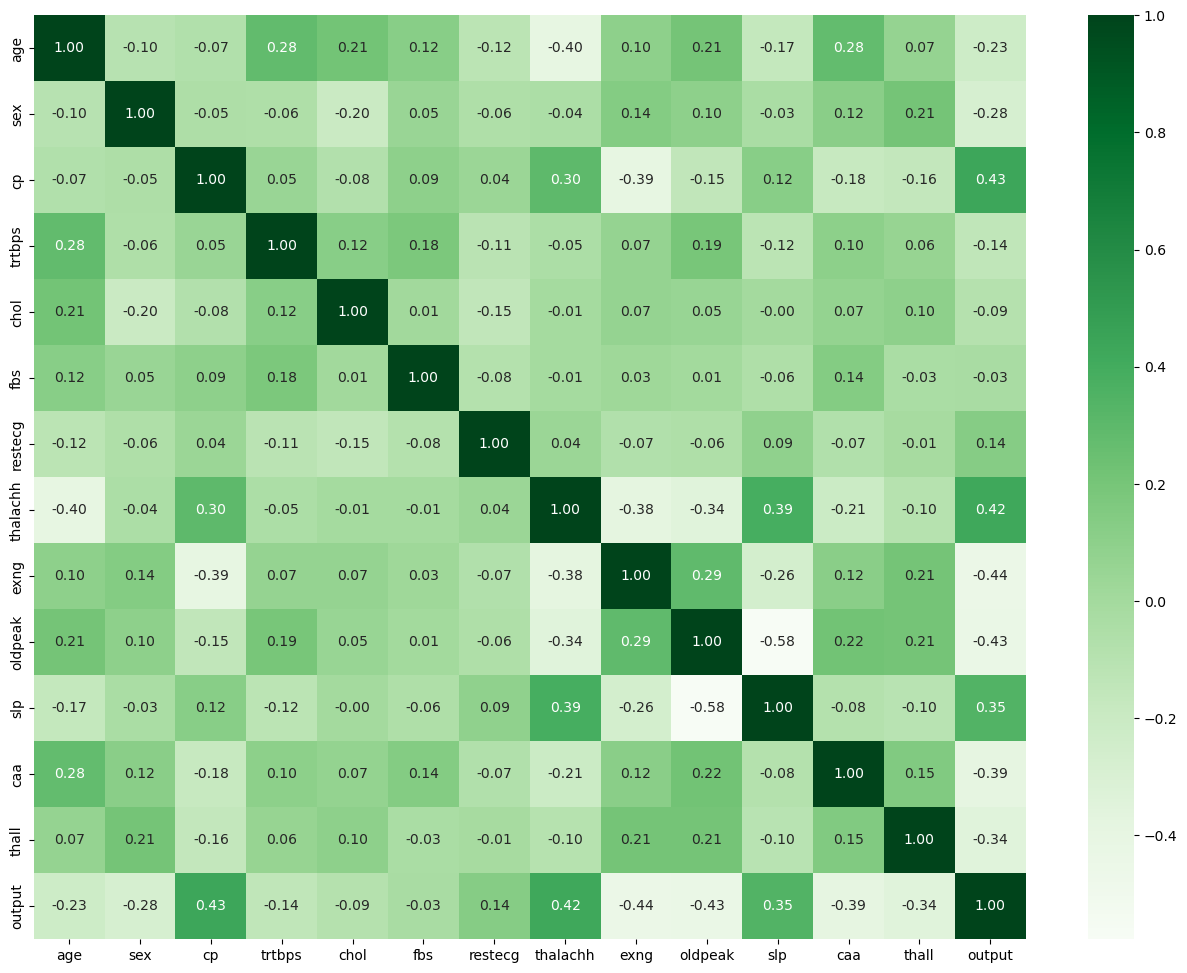

In [86]:
plt.figure(figsize=(16,12))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f", cmap="Greens")
plt.show()

#### there are no significant correlations in the dataset

### Verifying the distribution of the data

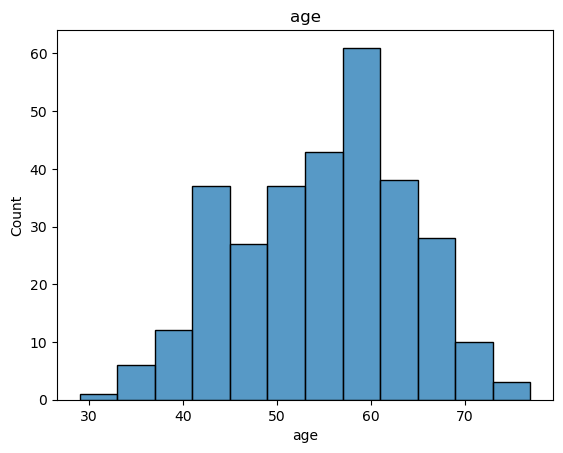

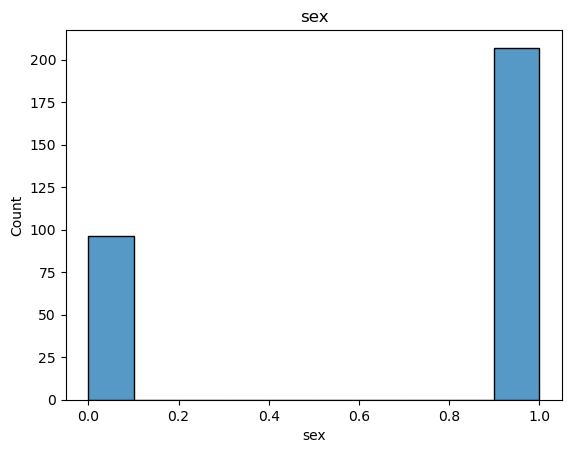

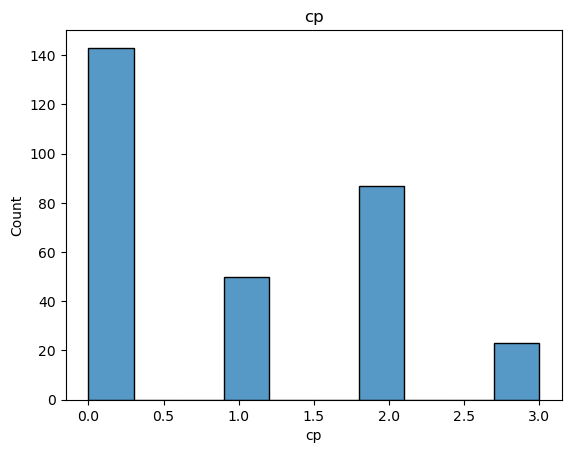

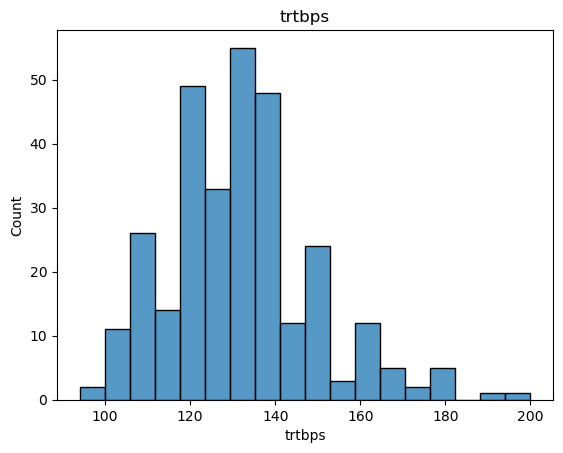

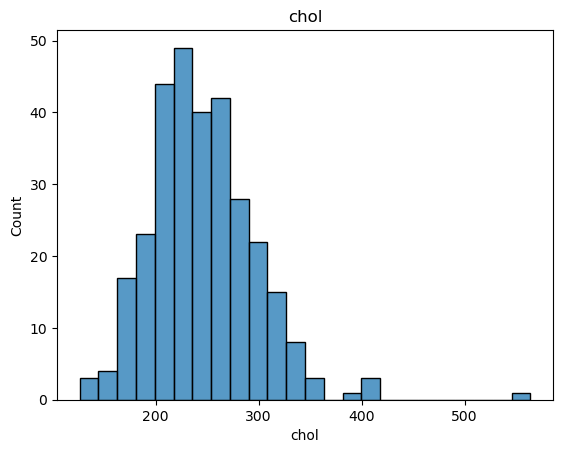

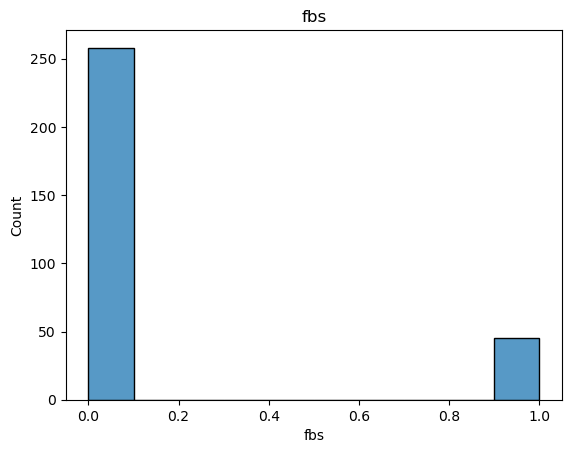

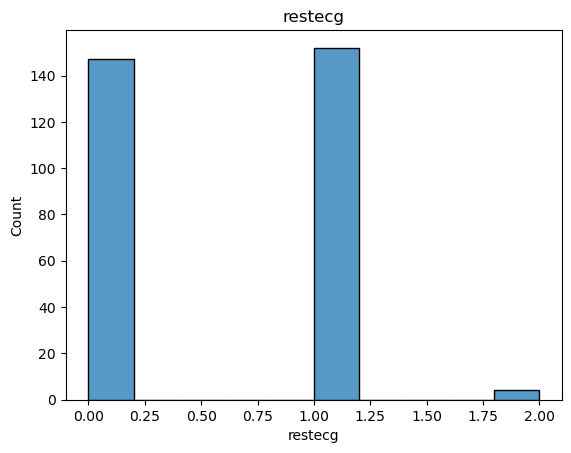

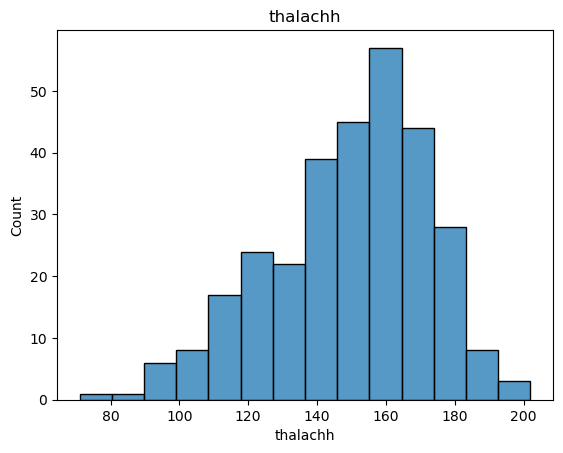

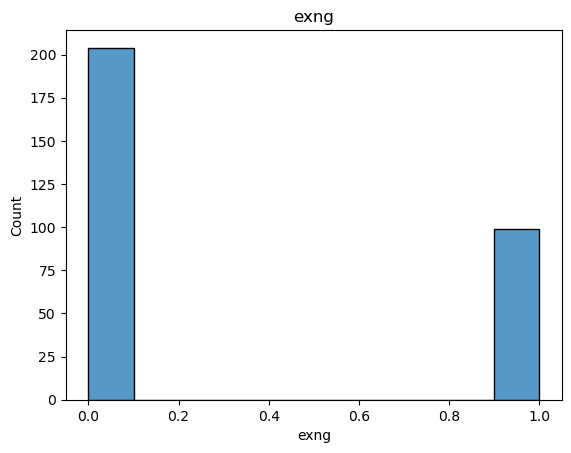

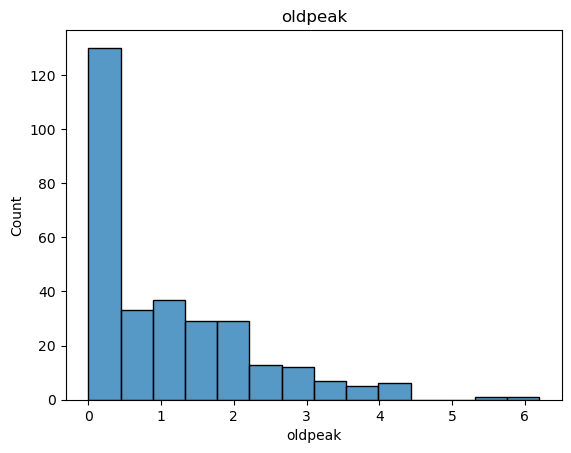

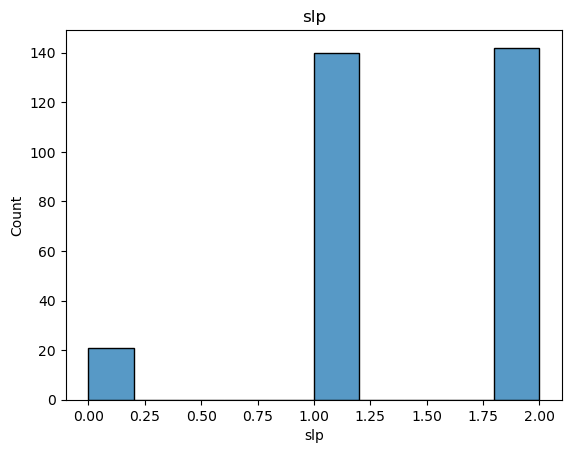

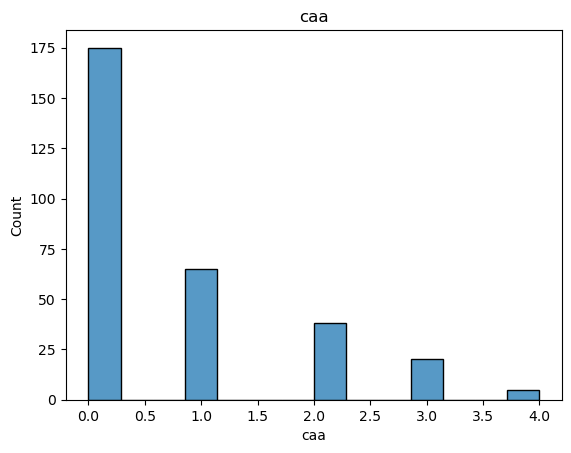

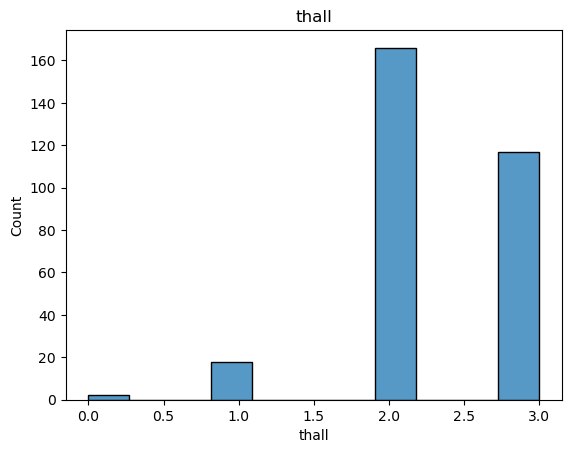

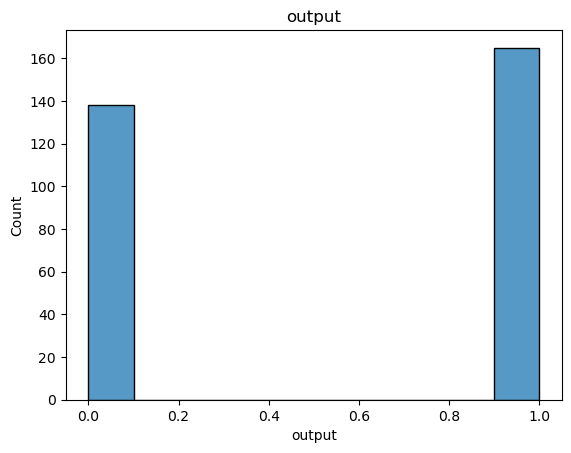

In [87]:
for col in data.columns:

    sns.histplot(data[col])
    plt.title(f'{col}')
    plt.show()

#### There are continuous and categorical variables in the dataset. The data are reasonably balanced.

### Checking potential outliers for numerical values

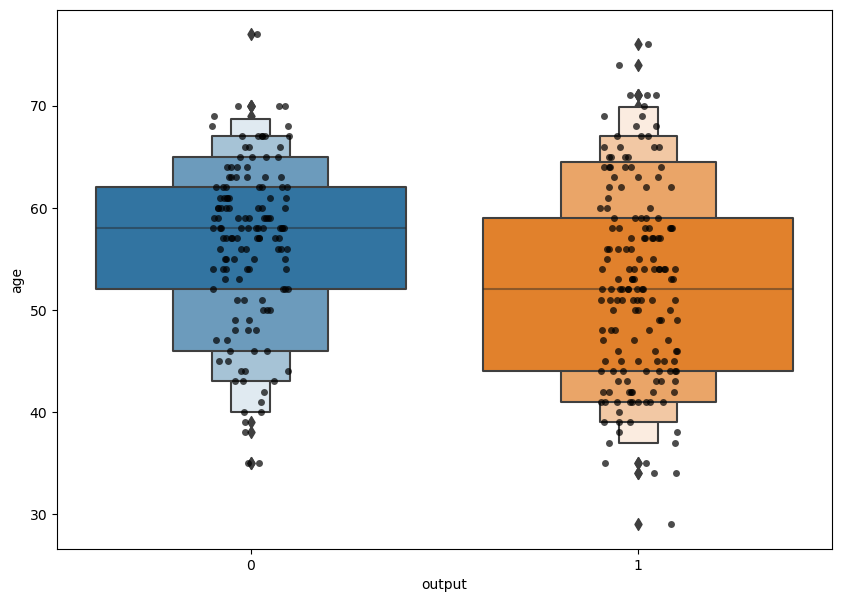

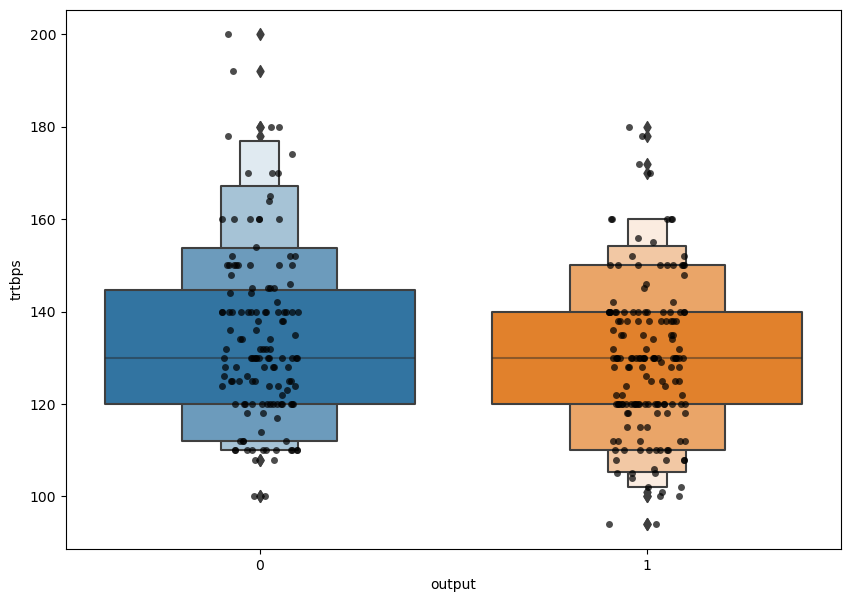

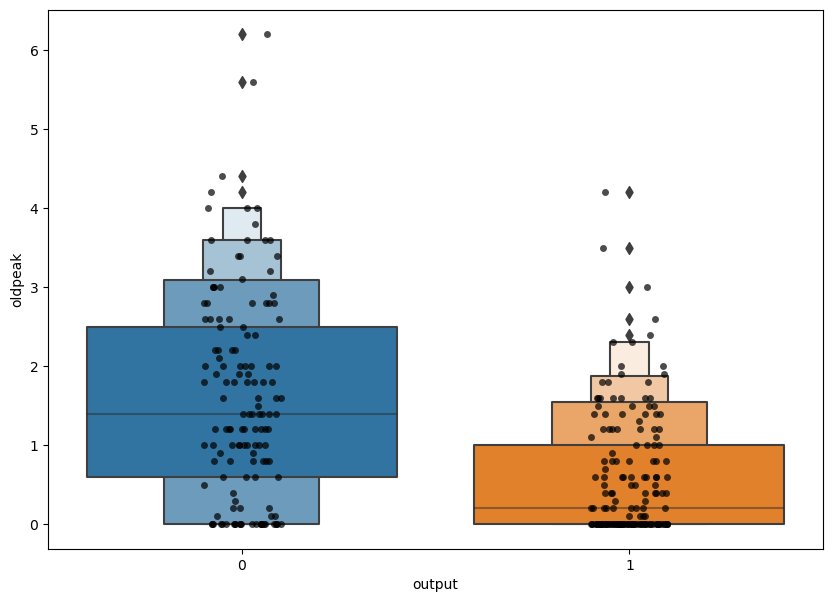

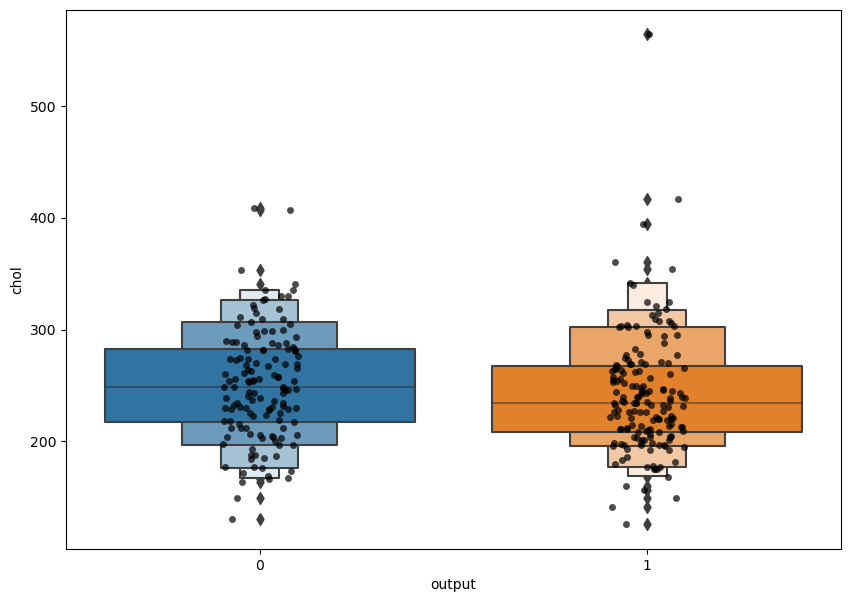

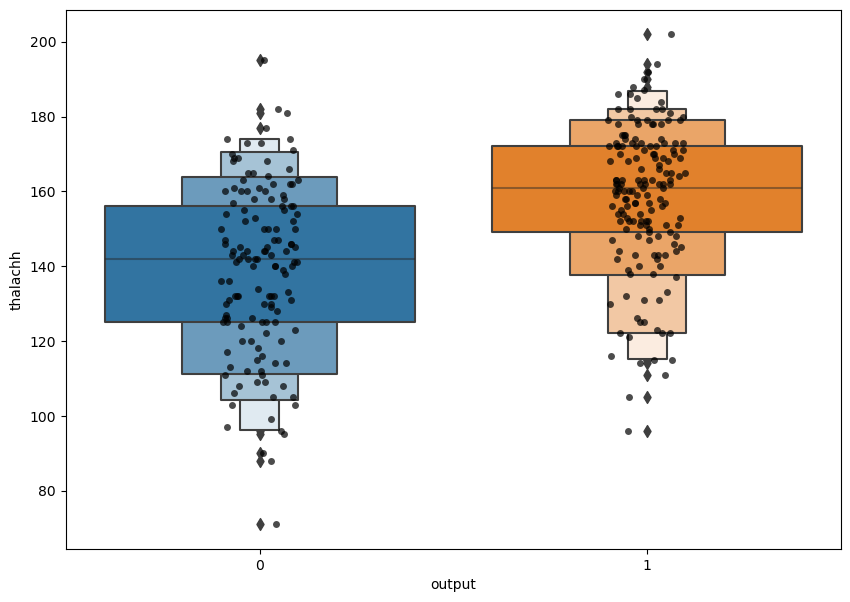

In [88]:
feature = ['age', 'trtbps', 'oldpeak', 'chol', 'thalachh']
for i in feature: 
    plt.figure(figsize=(10,7))
    sns.stripplot(x=data['output'], y=data[i], color="black", alpha=0.7)
    sns.boxenplot(x=data['output'], y=data[i])
    plt.show() 

#### There are outliers that do not appear to be significant

## Data preprocessing

### Feature scaling

In [89]:
X = data.drop('output', axis= 1)
y = data.output

In [90]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Splitting the dataset into a training and test set

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 42)

## Training the ann

In [172]:
model = tf.keras.models.Sequential()

In [173]:
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [174]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [175]:
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.7809 - accuracy: 0.4581
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.5198
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.5683
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.6388
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6012 - accuracy: 0.7269
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.7357
Epoch 7/100
8/8 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.7489
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5447 - accuracy: 0.7577
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.5319 - accuracy: 0.7533
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 0.4948 - accuracy: 0.7797
Epoch 11/100
8/8 [===========

8/8 [==============================] - 0s 4ms/step - loss: 0.2453 - accuracy: 0.8987
Epoch 85/100
8/8 [==============================] - 0s 4ms/step - loss: 0.2472 - accuracy: 0.9075
Epoch 86/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.8767
Epoch 87/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2330 - accuracy: 0.9251
Epoch 88/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2449 - accuracy: 0.9163
Epoch 89/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2403 - accuracy: 0.9163
Epoch 90/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2543 - accuracy: 0.8899
Epoch 91/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2343 - accuracy: 0.9031
Epoch 92/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2417 - accuracy: 0.9075
Epoch 93/100
8/8 [==============================] - 0s 3ms/step - loss: 0.2303 - accuracy: 0.9207
Epoch 94/100
8/8 [===============

## Model Evaluation

3/3 [==============================] - 0s 3ms/step


<AxesSubplot: >

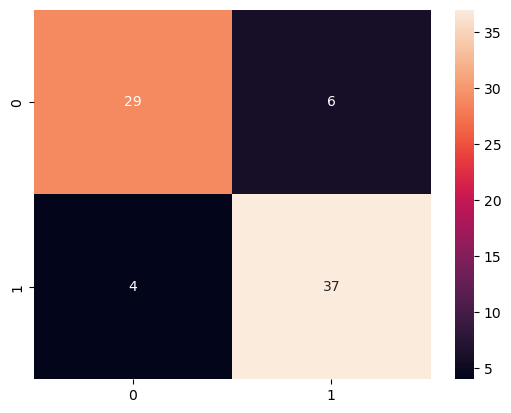

In [176]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot= True)

In [177]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.86      0.90      0.88        41

    accuracy                           0.87        76
   macro avg       0.87      0.87      0.87        76
weighted avg       0.87      0.87      0.87        76

